In [38]:
from __future__ import print_function  # Python 2 and 3
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline
pd.set_option('display.max_rows', 137)
pd.set_option('display.max_columns', 80)


# Random Forest Regressor Simulations

In [39]:
df = pd.read_csv('simulation.csv', index_col=0)

In [40]:
df

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,credit_hist_years,test_prediction,cagr
1794613,5000.0,0,17.76,180.17,0,10,4,63180.0,2,29,7.86,3.0,674.0,1.0,9.0,0.0,4368.0,68.2,27.0,0.0,0.0,0.0,0,19.1,0.051602,0.083062
1217005,14350.0,0,15.61,501.75,0,0,0,36000.0,2,15,17.40,0.0,714.0,1.0,11.0,0.0,12231.0,52.5,28.0,0.0,0.0,0.0,0,22.5,0.017364,0.078235
1302940,20400.0,1,24.08,587.82,11,5,4,60000.0,2,0,14.52,0.0,709.0,1.0,5.0,0.0,3332.0,18.7,13.0,0.0,0.0,0.0,0,5.2,-0.026140,0.100902
1129952,5000.0,0,15.99,175.77,1,1,4,34000.0,1,4,6.92,0.0,734.0,1.0,5.0,0.0,6350.0,48.8,6.0,0.0,0.0,0.0,0,7.2,0.028648,0.062390
1874132,3375.0,0,21.00,127.16,6,7,4,18000.0,2,26,21.40,0.0,679.0,0.0,10.0,0.0,7271.0,72.7,12.0,0.0,0.0,0.0,0,7.4,0.040139,0.105555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933641,30000.0,0,19.22,1103.03,4,10,4,175000.0,9,32,11.62,0.0,684.0,1.0,11.0,0.0,8286.0,19.5,32.0,0.0,0.0,0.0,0,20.7,0.044578,0.072284
1772678,16000.0,1,19.52,419.65,3,6,4,91000.0,2,4,23.74,0.0,674.0,0.0,14.0,0.0,4623.0,57.1,29.0,0.0,0.0,1.0,0,13.3,-0.003293,0.054017
1882531,24250.0,1,17.77,612.77,0,0,0,54000.0,4,32,6.89,2.0,694.0,2.0,11.0,0.0,6901.0,22.9,33.0,0.0,0.0,0.0,0,42.6,0.007919,0.006717
1332061,12550.0,1,23.40,356.69,9,10,0,68000.0,1,14,29.92,0.0,679.0,3.0,14.0,0.0,9105.0,83.5,62.0,0.0,0.0,0.0,0,11.9,-0.007781,-0.137995


In [41]:
#df = df[df['issue_d']<'2015-01-01']

In [42]:
df['loan_amnt'].describe()

count    30693.000000
mean     16014.245105
std       9339.032865
min       1000.000000
25%       8500.000000
50%      15000.000000
75%      22300.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [43]:
#unfiltered sample of 100 randomly selected loans
unfilter_sample = df.sample(n=100)

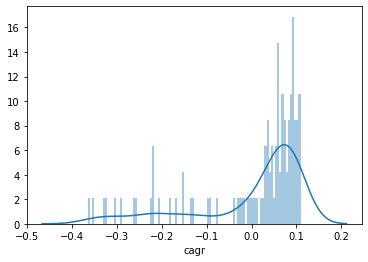

In [44]:
#distribution of unfiltered loans

import seaborn as sns 
sns.distplot(unfilter_sample['cagr'], bins = 100)


## Equal Weighted Loans

In [45]:
#function to simulate avg return on a portfolio of 100 loans given data and # of simulations

count=0
results = []

def simulate(dataframe, num_sims):
    count=0
    results = []
    
    while count <num_sims:
        sample = dataframe.sample(100)
        results.append(sample['cagr'].mean())
        count += 1
        
    return results




#### Finding the optimal CAGR Threshold

In [46]:
#creating a list of CAGR cuttoffs to compare
cutoffs = [0,.015,.03,.045]

#creating a dictionary that contains each DF based on the unique CAGR cutoff
rf_reg_dfs = {}
for c in cutoffs:
    rf_reg_dfs[c] = df[df['test_prediction']>c]
    


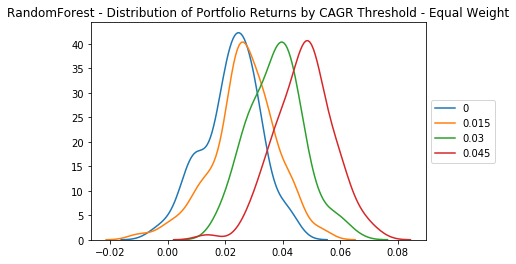

In [47]:
#Simulating 100 porfolios of 100 loans using different CAGR thresholds and 
#comparing performance (EQUAL WEIGHTED LOANS)


for i in rf_reg_dfs:
    temp = rf_reg_dfs[i]
    
    filt = simulate(temp,100)
    
    sns.distplot(filt, bins = 50, hist=False, label = i)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('RandomForest - Distribution of Portfolio Returns by CAGR Threshold - Equal Weight')

In [80]:
l=[]
for i in rf_reg_dfs:
    a = rf_reg_dfs[i]
    
    l.append(len(a))
    l.append(len(a[a['cagr']<0]))
    l.append((len(a[a['cagr']<0])/(len(a))))

In [83]:
l = np.array(l)
l = l.reshape(4,3)
l = pd.DataFrame(l)
l.columns = ['count', 'false_postives', 'percent_false']
l

,count,false_postives,percent_false
0,20810.0,4312.0,0.207208
1,11998.0,2180.0,0.181697
2,4256.0,624.0,0.146617
3,780.0,92.0,0.117949


#### Portfolio Performance of Our Pool of Loans vs Randomly Selected Pool of Loans

Text(0.5, 1.0, 'RandomForest Portfolio Returns - Our Pool vs Random - Equal Weight')

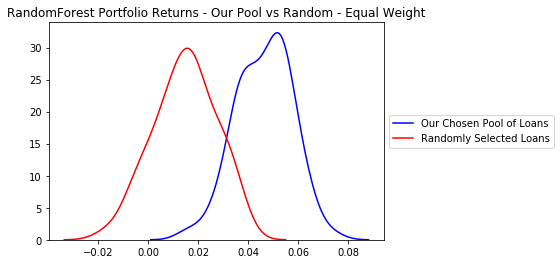

In [48]:
top_forest_df = rf_reg_dfs[.045]
forestreg_filter_results = simulate(top_forest_df, 100)
forestreg_unfilter_results = simulate(df, 100)

sns.distplot(forestreg_filter_results, bins = 50, hist=False, color='blue', label = 'Our Chosen Pool of Loans')
sns.distplot(forestreg_unfilter_results, bins = 50, hist=False, color='red', label = 'Randomly Selected Loans')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('RandomForest Portfolio Returns - Our Pool vs Random - Equal Weight')

## Weighted Avg Loans

In [49]:
#function to simulate WEIGHTED avg return on a portfolio of 100 loans given data and # of simulations

def simulate_weighted(dataframe, num_sims):
    count=0
    results = []
    
    while count <num_sims:
        sample = dataframe.sample(100)
        sample['weight'] = sample['loan_amnt']/sample['loan_amnt'].sum()
        sample['weighted_cagr'] = sample['cagr']*sample['weight']
        results.append(sample['weighted_cagr'].sum())
        count += 1
        
    return results

#### Finding the optimal CAGR Threshold

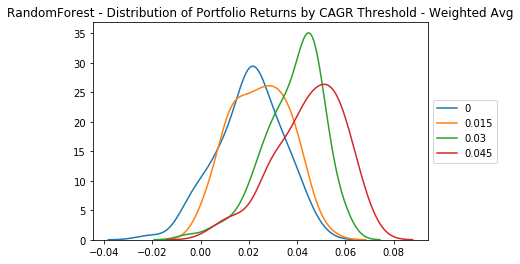

In [50]:
for i in rf_reg_dfs:
    temp = rf_reg_dfs[i]
    
    filt = simulate_weighted(temp,100)
    
    sns.distplot(filt, bins = 50, hist=False, label = i)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('RandomForest - Distribution of Portfolio Returns by CAGR Threshold - Weighted Avg')

#### Portfolio Performance of Our Pool of Loans vs Randomly Selected Pool of Loans

Text(0.5, 1.0, 'RandomForest Portfolio Returns - Our Pool vs Random - Weighted Avg Loans')

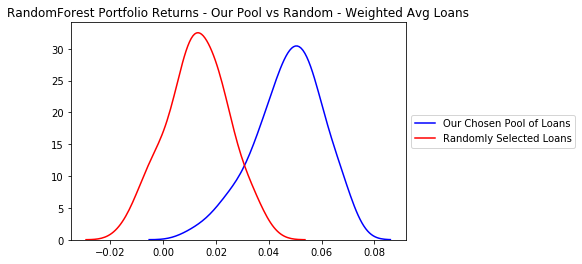

In [51]:
top_forest_df = rf_reg_dfs[.045]
forestreg_filter_results_weighted = simulate_weighted(top_forest_df, 100)
forestreg_unfilter_results_weighted = simulate_weighted(df, 100)

sns.distplot(forestreg_filter_results_weighted, bins = 50, hist=False, color='blue', label = 'Our Chosen Pool of Loans')
sns.distplot(forestreg_unfilter_results_weighted, bins = 50, hist=False, color='red', label = 'Randomly Selected Loans')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('RandomForest Portfolio Returns - Our Pool vs Random - Weighted Avg Loans')

# XGBoost Regressor Simulation

In [52]:
data = pd.read_csv('xgboost_reg_cagr.csv', index_col=0)


In [53]:
data

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,credit_hist_years,prediction,cagr
1290584,27325.0,1,20.49,731.42,6,5,0,90000.0,4,9,19.97,0.0,709.0,3.0,16.0,0.0,12040.0,41.8,23.0,0.0,0.0,0.0,0,10.2,0.012266,-0.389650
1841344,22250.0,1,21.49,608.09,7,10,3,50000.0,2,32,21.86,0.0,709.0,0.0,15.0,0.0,32318.0,61.7,25.0,0.0,0.0,0.0,0,24.3,0.006193,0.032047
1775149,21000.0,1,24.08,605.11,11,10,0,61000.0,2,21,18.00,1.0,689.0,3.0,15.0,1.0,6613.0,23.5,46.0,0.0,0.0,0.0,0,23.4,0.004706,0.059950
1634124,12750.0,1,14.46,299.72,1,6,3,35000.0,4,4,12.51,0.0,689.0,0.0,11.0,0.0,5187.0,64.8,24.0,0.0,0.0,0.0,0,31.3,0.006544,0.071202
1646123,23500.0,0,14.96,814.16,1,10,3,124000.0,0,5,8.25,1.0,709.0,0.0,4.0,0.0,255.0,0.8,10.0,0.0,0.0,0.0,0,14.3,0.021064,0.076420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209252,22825.0,1,22.15,632.35,9,3,4,63600.0,2,19,25.49,2.0,669.0,0.0,25.0,0.0,9256.0,62.1,70.0,0.0,0.0,0.0,0,11.2,0.004234,0.086812
1908757,18000.0,0,19.05,660.27,3,7,4,51925.0,2,41,18.49,0.0,669.0,0.0,13.0,0.0,18223.0,86.8,28.0,0.0,0.0,0.0,0,11.2,0.014204,0.096926
1176969,35000.0,1,22.15,969.65,9,3,4,100000.0,2,10,20.07,0.0,684.0,0.0,29.0,0.0,19067.0,62.7,36.0,0.0,0.0,0.0,0,22.8,0.013952,-0.123932
1163427,35000.0,0,17.57,1257.80,3,10,0,191000.0,1,41,18.58,0.0,714.0,0.0,11.0,0.0,33816.0,86.0,22.0,0.0,0.0,0.0,0,17.5,0.024432,-0.202465


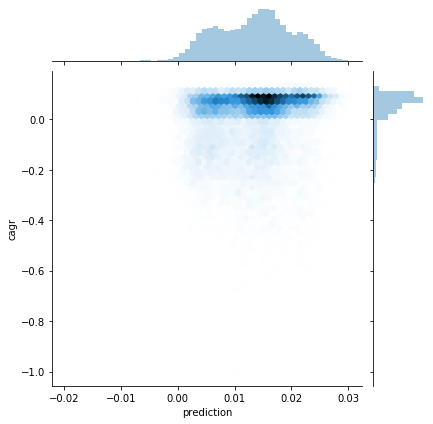

In [54]:
sns.jointplot(x='prediction', y='cagr',data=data, kind='hex')
#plt.ylim(-.5, .2)

In [55]:
#creating a list of CAGR cuttoffs to compare
cutoffs = [0,.01,.015,.02,.025]

#creating a dictionary that contains each DF based on the unique CAGR cutoff
boost_reg_dfs = {}
for c in cutoffs:
    boost_reg_dfs[c] = data[data['prediction']>c]
 

## Equal Weighted Loans

#### Finding the optimal CAGR Threshold

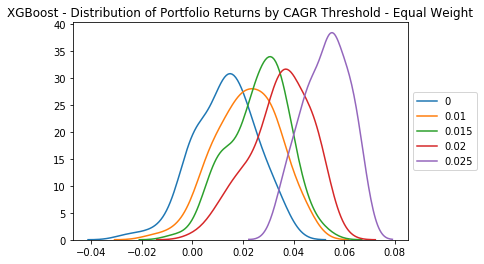

In [56]:
#Simulating 100 porfolios of 100 loans using different CAGR thresholds and 
#comparing performance (EQUAL WEIGHTED LOANS)


for i in boost_reg_dfs:
    temp = boost_reg_dfs[i]
    
    filt = simulate(temp,100)
    
    sns.distplot(filt, bins = 50, hist=False, label = i)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('XGBoost - Distribution of Portfolio Returns by CAGR Threshold - Equal Weight')
    

#### Portfolio Performance of Our Pool of Loans vs Randomly Selected Pool of Loans

Text(0.5, 1.0, 'XGBoost Portfolio Returns - Our Pool vs Random - Equal Weight')

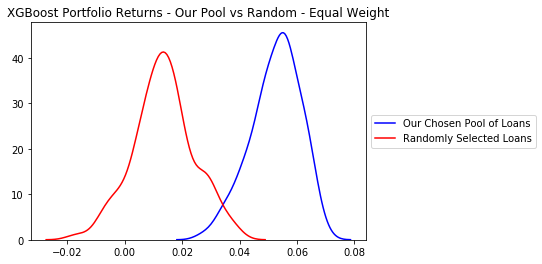

In [57]:
top_boost_reg_df = boost_reg_dfs[.025]
boostreg_filter_results = simulate(top_boost_reg_df, 100)
boostreg_unfilter_results = simulate(data, 100)

sns.distplot(boostreg_filter_results, bins = 50, hist=False, color='blue', label = 'Our Chosen Pool of Loans')
sns.distplot(boostreg_unfilter_results, bins = 50, hist=False, color='red', label = 'Randomly Selected Loans')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('XGBoost Portfolio Returns - Our Pool vs Random - Equal Weight')


## Weighted Avg Loans

#### Finding the optimal CAGR Threshold

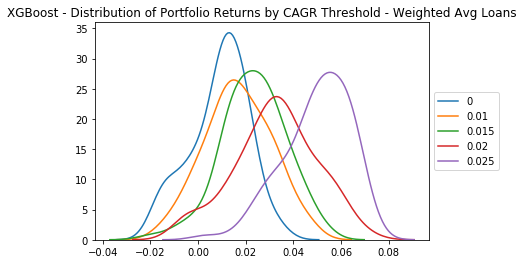

In [58]:
for i in boost_reg_dfs:
    temp = boost_reg_dfs[i]
    
    filt = simulate_weighted(temp,100)
    
    sns.distplot(filt, bins = 50, hist=False, label = i)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('XGBoost - Distribution of Portfolio Returns by CAGR Threshold - Weighted Avg Loans')

#### Performance of Our Pool of Loans vs Randomly Selected Pool of Loans

Text(0.5, 1.0, 'XGBoost Portfolio Returns - Our Pool vs Random - Weighted Avg Loans')

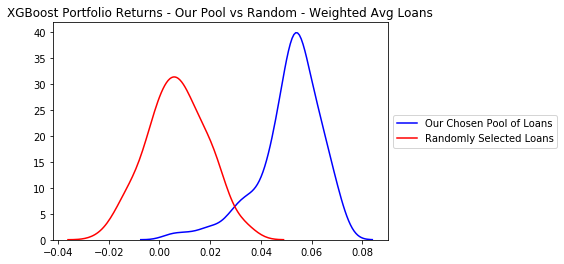

In [59]:
top_boost_reg_df = boost_reg_dfs[.025]
boostreg_filter_results_weighted = simulate_weighted(top_boost_reg_df, 100)
boostreg_unfilter_results_weighted = simulate_weighted(data, 100)

sns.distplot(boostreg_filter_results_weighted, bins = 50, hist=False, color='blue', label = 'Our Chosen Pool of Loans')
sns.distplot(boostreg_unfilter_results_weighted, bins = 50, hist=False, color='red', label = 'Randomly Selected Loans')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('XGBoost Portfolio Returns - Our Pool vs Random - Weighted Avg Loans')

# XGBoost Classifier Simulation

In [60]:
d = pd.read_csv('xgb_class_test.csv', index_col=0)
cagrs = pd.read_csv('model_df_cagr.csv', index_col=0)

In [61]:
ind = list(d.index)

In [62]:
cagrs= cagrs[cagrs.index.isin(ind)]
cagrs['cagr']

1117060    0.059097
1117103    0.008582
1117104    0.101385
1117124    0.015729
1117143    0.008240
             ...   
1939312    0.003090
1939322    0.098514
1939338    0.024139
1939340   -0.059729
1939341   -0.058612
Name: cagr, Length: 30289, dtype: float64

In [63]:
d = pd.concat([d, cagrs['cagr']], axis=1)

In [64]:
test = d[d['prob_paid_back']>.9]

In [65]:
test['loan_status'].value_counts()

1    612
0     89
Name: loan_status, dtype: int64

In [66]:
539/(539+64)

0.8938640132669984

In [67]:
d

,loan_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,credit_hist_years,prob_paid_back,loan_status,cagr
1117060,2000.0,0,15.99,70.31,1,46279,7,4,37000.0,9,3,16.19,2.0,704.0,1.0,9.0,0.0,4533.0,20.1,22.0,0.0,0.0,0.0,0,21.0,0.900687,1,0.059097
1117103,12000.0,1,17.86,303.81,4,32862,4,4,60000.0,2,41,28.78,0.0,709.0,0.0,12.0,0.0,13846.0,41.1,15.0,0.0,0.0,0.0,0,10.5,0.638100,1,0.008582
1117104,11175.0,0,19.99,415.25,7,8625,7,4,31240.0,2,17,15.02,0.0,664.0,0.0,9.0,0.0,11046.0,37.1,23.0,0.0,0.0,0.0,0,8.0,0.688223,1,0.101385
1117124,35000.0,1,15.99,850.95,1,18584,10,4,91000.0,2,28,2.76,0.0,729.0,1.0,9.0,1.0,7562.0,26.7,22.0,0.0,0.0,0.0,0,26.1,0.643793,1,0.015729
1117143,12000.0,1,17.14,299.14,3,23343,7,0,74300.0,1,40,14.02,1.0,679.0,0.0,8.0,0.0,21934.0,78.1,19.0,0.0,0.0,0.0,0,25.1,0.780036,1,0.008240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939312,25400.0,1,18.64,653.87,5,21548,10,3,50800.0,1,42,11.48,0.0,719.0,1.0,9.0,0.0,20353.0,70.4,26.0,0.0,0.0,0.0,0,25.8,0.679561,1,0.003090
1939322,28800.0,1,20.30,767.84,9,50421,10,0,75000.0,2,24,17.15,1.0,689.0,2.0,10.0,0.0,29353.0,83.6,32.0,0.0,0.0,0.0,0,23.2,0.717075,1,0.098514
1939338,18000.0,1,22.35,500.73,14,50007,4,4,100000.0,2,31,15.31,0.0,669.0,3.0,11.0,0.0,12659.0,64.9,16.0,0.0,0.0,0.0,0,6.3,0.634243,1,0.024139
1939340,35000.0,1,22.74,610.60,15,47474,10,4,76000.0,5,31,0.24,1.0,679.0,3.0,3.0,0.0,1455.0,14.5,31.0,0.0,0.0,0.0,0,16.7,0.564564,1,-0.059729


In [68]:
prob_thresholds = [.5,.6,.7,.8,.9]

boost_class_dfs={}

for p in prob_thresholds:
    temp = d.copy()
    
    boost_class_dfs[p]= temp[temp['prob_paid_back']>p] 
    
boost_class_dfs[.9]

,loan_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,credit_hist_years,prob_paid_back,loan_status,cagr
1117060,2000.0,0,15.99,70.31,1,46279,7,4,37000.0,9,3,16.19,2.0,704.0,1.0,9.0,0.0,4533.0,20.1,22.0,0.0,0.0,0.0,0,21.0,0.900687,1,0.059097
1117878,1500.0,0,15.59,52.44,0,12604,10,4,40000.0,10,31,21.54,11.0,664.0,0.0,11.0,0.0,3804.0,53.6,28.0,0.0,0.0,0.0,0,13.8,0.921448,0,-0.016633
1119085,3600.0,0,16.49,127.44,2,62292,10,0,68000.0,4,37,5.28,0.0,669.0,1.0,7.0,1.0,3352.0,29.4,11.0,0.0,0.0,0.0,0,14.1,0.907992,1,0.033656
1120750,5000.0,0,15.59,174.78,0,16973,7,0,53000.0,1,36,25.25,2.0,684.0,0.0,11.0,0.0,42114.0,78.9,33.0,0.0,0.0,0.0,0,17.6,0.901264,1,0.079368
1121554,10000.0,0,17.14,357.23,3,4142,10,0,112987.0,2,0,14.45,0.0,684.0,1.0,9.0,0.0,9864.0,73.1,33.0,0.0,0.0,0.0,0,23.7,0.936010,0,0.064712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931738,17800.0,0,18.25,645.75,2,3219,1,0,120000.0,1,46,20.56,0.0,699.0,1.0,20.0,1.0,12167.0,70.3,44.0,0.0,0.0,0.0,0,13.0,0.935655,1,0.079909
1932655,35000.0,0,21.48,1327.27,8,55115,10,0,150000.0,2,13,6.62,1.0,684.0,1.0,7.0,0.0,30429.0,96.9,22.0,0.0,0.0,0.0,0,20.3,0.913526,0,-0.151893
1934337,2000.0,0,19.22,73.54,4,29703,1,4,74400.0,2,40,12.87,0.0,669.0,1.0,4.0,0.0,7484.0,91.3,6.0,0.0,0.0,0.0,0,4.0,0.916030,1,0.095599
1934556,18000.0,0,18.25,653.01,2,47313,4,4,104000.0,2,31,6.00,0.0,669.0,1.0,7.0,0.0,21323.0,89.2,19.0,0.0,0.0,0.0,0,8.3,0.900243,1,0.091877


## Equal Weighted Loans

#### Finding the optimal Probability Thresholds

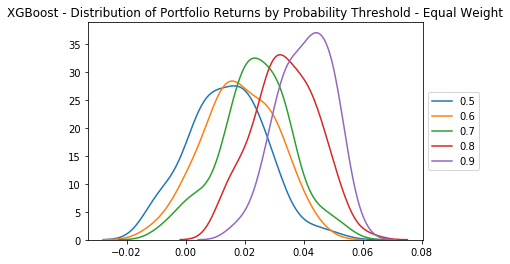

In [69]:
#Simulating 100 porfolios of 100 loans using different CAGR thresholds and 
#comparing performance (EQUAL WEIGHTED LOANS)

for i in boost_class_dfs:
    temp = boost_class_dfs[i]
    
    filt = simulate(temp,100)
    
    sns.distplot(filt, bins = 50, hist=False, label = i)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('XGBoost - Distribution of Portfolio Returns by Probability Threshold - Equal Weight')

#### Performance of Our Pool of Loans vs Randomly Selected Pool of Loans

Text(0.5, 1.0, 'XGBoost Classifier Portfolio Returns - Our Pool vs Random - Equal Weight')

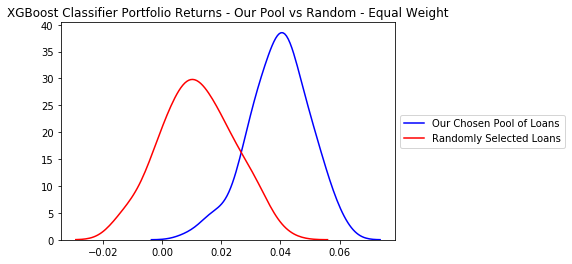

In [70]:
top_boost_class_df = boost_class_dfs[.9]
boostclass_filter_results = simulate(top_boost_class_df, 100)
boostclass_unfilter_results = simulate(d, 100)

sns.distplot(boostclass_filter_results, bins = 50, hist=False, color='blue', label = 'Our Chosen Pool of Loans')
sns.distplot(boostclass_unfilter_results, bins = 50, hist=False, color='red', label = 'Randomly Selected Loans')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('XGBoost Classifier Portfolio Returns - Our Pool vs Random - Equal Weight')

## Weighted Avg Loans

#### Finding the optimal CAGR Threshold

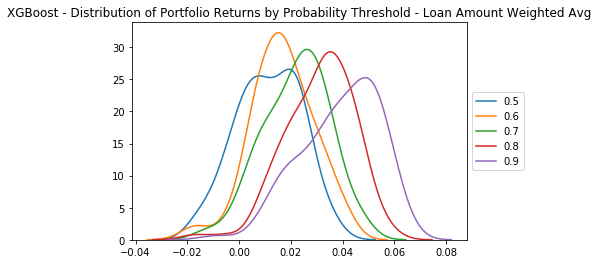

In [71]:
for i in boost_class_dfs:
    temp = boost_class_dfs[i]
    
    filt = simulate_weighted(temp,100)
    
    sns.distplot(filt, bins = 50, hist=False, label = i)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('XGBoost - Distribution of Portfolio Returns by Probability Threshold - Loan Amount Weighted Avg')

#### Performance of Our Pool of Loans vs Randomly Selected Pool of Loans

Text(0.5, 1.0, 'XGBoost Classifier Portfolio Returns - Our Pool vs Random - Loan Amount Weighted Avg')

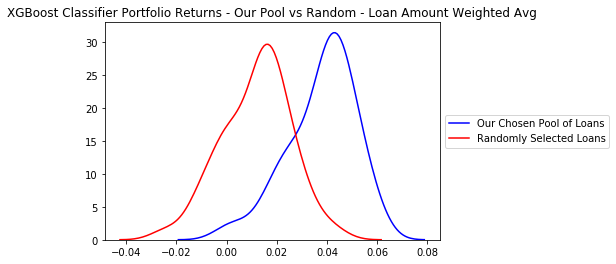

In [72]:
top_boost_class_df = boost_class_dfs[.9]
boostclass_filter_results_weighted = simulate_weighted(top_boost_class_df, 100)
boostclass_unfilter_results_weighted = simulate_weighted(d, 100)

sns.distplot(boostclass_filter_results_weighted, bins = 50, hist=False, color='blue', label = 'Our Chosen Pool of Loans')
sns.distplot(boostclass_unfilter_results_weighted, bins = 50, hist=False, color='red', label = 'Randomly Selected Loans')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('XGBoost Classifier Portfolio Returns - Our Pool vs Random - Loan Amount Weighted Avg')

### Comparing RandomForest, XGBoost Regressor and XGBoost Classifier (Equal Weighted)

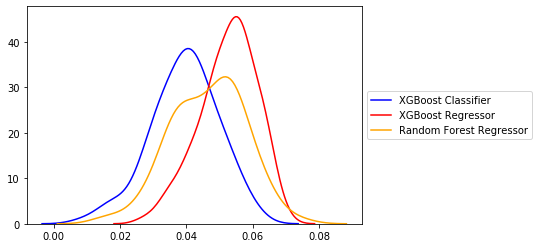

In [73]:
sns.distplot(boostclass_filter_results, bins = 50, hist=False, color='blue', label = 'XGBoost Classifier')
sns.distplot(boostreg_filter_results, bins = 50, hist=False, color='red', label = 'XGBoost Regressor')
sns.distplot(forestreg_filter_results, bins = 50, hist=False, color='orange', label = 'Random Forest Regressor')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))



### Comparing RandomForest, XGBoost Regressor and XGBoost Classifier (Loan Amount Weighted Avg)

Text(0.5, 0, 'CAGR')

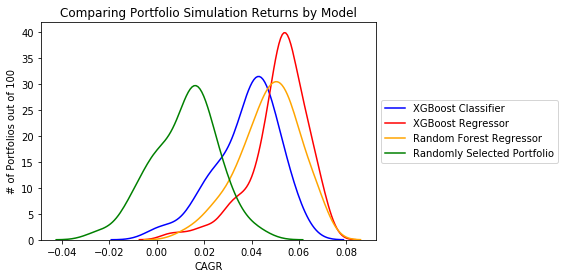

In [77]:
sns.distplot(boostclass_filter_results_weighted, bins = 50, hist=False, color='blue', label = 'XGBoost Classifier')
sns.distplot(boostreg_filter_results_weighted, bins = 50, hist=False, color='red', label = 'XGBoost Regressor')
sns.distplot(forestreg_filter_results_weighted, bins = 50, hist=False, color='orange', label = 'Random Forest Regressor')
sns.distplot(boostclass_unfilter_results_weighted, bins = 50, hist=False, color='green', label = 'Randomly Selected Portfolio')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Comparing Portfolio Simulation Returns by Model')
plt.ylabel('# of Portfolios out of 100')
plt.xlabel('CAGR')


In [38]:
top_boost_class_df

,loan_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,credit_hist_years,prob_paid_back,loan_status,cagr
1117060,2000.0,0,15.99,70.31,1,46279,7,4,37000.0,9,3,16.19,2.0,704.0,1.0,9.0,0.0,4533.0,20.1,22.0,0.0,0.0,0.0,0,21.0,0.900687,1,0.059097
1117878,1500.0,0,15.59,52.44,0,12604,10,4,40000.0,10,31,21.54,11.0,664.0,0.0,11.0,0.0,3804.0,53.6,28.0,0.0,0.0,0.0,0,13.8,0.921448,0,-0.016633
1119085,3600.0,0,16.49,127.44,2,62292,10,0,68000.0,4,37,5.28,0.0,669.0,1.0,7.0,1.0,3352.0,29.4,11.0,0.0,0.0,0.0,0,14.1,0.907992,1,0.033656
1120750,5000.0,0,15.59,174.78,0,16973,7,0,53000.0,1,36,25.25,2.0,684.0,0.0,11.0,0.0,42114.0,78.9,33.0,0.0,0.0,0.0,0,17.6,0.901264,1,0.079368
1121554,10000.0,0,17.14,357.23,3,4142,10,0,112987.0,2,0,14.45,0.0,684.0,1.0,9.0,0.0,9864.0,73.1,33.0,0.0,0.0,0.0,0,23.7,0.936010,0,0.064712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931738,17800.0,0,18.25,645.75,2,3219,1,0,120000.0,1,46,20.56,0.0,699.0,1.0,20.0,1.0,12167.0,70.3,44.0,0.0,0.0,0.0,0,13.0,0.935655,1,0.079909
1932655,35000.0,0,21.48,1327.27,8,55115,10,0,150000.0,2,13,6.62,1.0,684.0,1.0,7.0,0.0,30429.0,96.9,22.0,0.0,0.0,0.0,0,20.3,0.913526,0,-0.151893
1934337,2000.0,0,19.22,73.54,4,29703,1,4,74400.0,2,40,12.87,0.0,669.0,1.0,4.0,0.0,7484.0,91.3,6.0,0.0,0.0,0.0,0,4.0,0.916030,1,0.095599
1934556,18000.0,0,18.25,653.01,2,47313,4,4,104000.0,2,31,6.00,0.0,669.0,1.0,7.0,0.0,21323.0,89.2,19.0,0.0,0.0,0.0,0,8.3,0.900243,1,0.091877


In [39]:
top_boost_reg_df

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,credit_hist_years,prediction,cagr
1816739,1500.0,0,17.56,53.90,0,10,0,53000.0,9,38,10.17,0.0,719.0,0.0,11.0,0.0,11073.0,57.1,14.0,0.0,0.0,0.0,0,18.2,0.025772,0.022819
1230319,4000.0,0,15.61,139.86,0,3,0,37440.0,4,5,16.96,0.0,669.0,1.0,4.0,0.0,7044.0,65.8,15.0,0.0,0.0,1.0,0,14.8,0.025166,0.053570
1279155,3500.0,0,18.24,126.96,4,2,4,135000.0,8,36,9.23,0.0,689.0,1.0,10.0,0.0,10445.0,47.9,18.0,0.0,0.0,0.0,0,16.5,0.025334,0.058074
1652385,1600.0,0,18.61,58.34,19,3,0,124200.0,9,5,28.29,0.0,644.0,0.0,15.0,0.0,73943.0,98.1,38.0,0.0,0.0,0.0,0,17.5,0.025660,0.092600
1895742,3000.0,0,17.77,108.12,0,1,4,73100.0,2,46,16.92,0.0,664.0,1.0,9.0,0.0,12686.0,94.0,25.0,0.0,0.0,0.0,0,10.3,0.025022,0.090638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822162,4200.0,0,17.56,150.92,0,7,0,175000.0,9,43,21.00,2.0,694.0,0.0,10.0,0.0,12192.0,95.2,44.0,0.0,0.0,0.0,0,25.0,0.029021,0.076552
1826081,2000.0,0,18.25,72.56,1,10,0,118000.0,12,47,27.52,0.0,674.0,0.0,12.0,0.0,13278.0,56.3,28.0,0.0,0.0,0.0,0,14.1,0.026080,0.071748
1805223,3000.0,0,24.50,118.49,12,3,4,68000.0,9,4,12.26,0.0,689.0,1.0,4.0,0.0,2881.0,96.0,5.0,0.0,0.0,0.0,0,14.8,0.025157,0.124476
1309294,4600.0,0,19.99,170.93,5,10,0,135000.0,9,40,34.55,3.0,669.0,0.0,8.0,0.0,27309.0,98.9,25.0,0.0,0.0,0.0,0,32.2,0.027110,0.101843


In [40]:
top_forest_df

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,credit_hist_years,test_prediction,cagr
1794613,5000.0,0,17.76,180.17,0,10,4,63180.0,2,29,7.86,3.0,674.0,1.0,9.0,0.0,4368.0,68.2,27.0,0.0,0.0,0.0,0,19.1,0.051602,0.083062
1251081,4675.0,0,20.99,176.11,8,10,4,88300.0,4,20,12.44,3.0,669.0,0.0,7.0,0.0,2640.0,80.0,29.0,0.0,0.0,0.0,0,16.6,0.052747,0.107021
1870096,35000.0,1,22.95,985.67,10,10,0,91945.0,2,26,15.92,0.0,684.0,1.0,10.0,0.0,25083.0,74.4,35.0,0.0,0.0,0.0,0,26.8,0.046955,0.109677
1349744,12700.0,0,18.25,460.73,2,8,0,125000.0,2,32,11.40,1.0,684.0,3.0,11.0,0.0,10141.0,50.7,26.0,0.0,0.0,0.0,0,18.1,0.050926,-0.078271
1230387,4000.0,0,23.43,155.74,10,10,0,100000.0,9,21,9.26,0.0,674.0,1.0,7.0,0.0,6018.0,68.4,13.0,0.0,0.0,0.0,0,29.1,0.066289,0.118881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1761494,2500.0,0,23.70,97.69,10,9,3,34000.0,9,9,20.97,0.0,684.0,0.0,10.0,0.0,19559.0,69.4,21.0,0.0,0.0,0.0,0,12.2,0.045640,-0.461329
1204917,1200.0,0,23.43,46.73,10,10,0,54000.0,12,33,19.60,0.0,684.0,2.0,9.0,0.0,12977.0,86.5,16.0,0.0,0.0,0.0,0,11.8,0.053403,-0.336105
1861220,2500.0,0,19.05,91.71,3,8,4,70000.0,7,41,28.92,0.0,704.0,0.0,10.0,0.0,8013.0,83.5,27.0,0.0,0.0,0.0,0,19.8,0.047060,0.033574
1855743,4800.0,0,18.49,174.72,1,5,0,46821.0,9,33,22.12,0.0,694.0,0.0,7.0,0.0,5333.0,82.0,19.0,0.0,0.0,0.0,0,18.5,0.048507,0.094278


### False Positive Analysis by Threshold for each model 

In [106]:
l=[]
for i in rf_reg_dfs:
    a = rf_reg_dfs[i]
    
    l.append(len(a))
    l.append(len(a[a['cagr']<0]))
    l.append((len(a[a['cagr']<0])/(len(a))))

In [107]:
l = np.array(l)
l = l.reshape(4,3)
l = pd.DataFrame(l)
l.columns = ['pool_size', 'false_postives', 'percent_false']
l['threshold'] = [0,.015,.03,.045]

In [108]:
l

,pool_size,false_postives,percent_false,threshold
0,20810.0,4312.0,0.207208,0.000
1,11998.0,2180.0,0.181697,0.015
2,4256.0,624.0,0.146617,0.030
3,780.0,92.0,0.117949,0.045


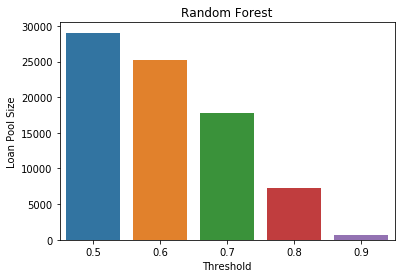

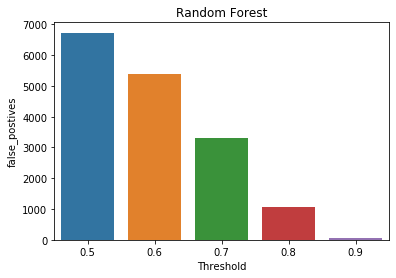

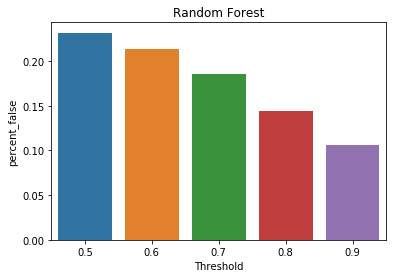

In [120]:
feats = ['pool_size', 'false_postives', 'percent_false']

for f in feats:
    plt.figure()
    sns.barplot(x='threshold', y = f, data=l)
    plt.xlabel('Threshold')
    plt.title('Random Forest')
    
    if f == 'pool_size':
        plt.ylabel('Loan Pool Size')
        
    if f == 'false_positives':
        plt.ylabel('Number of False Positives')
        
    if f == 'percent_false':
        plt.ylabel('Percentage of False Positives')
        
    
    

In [110]:
# XGBoost Regression

l=[]
for i in boost_reg_dfs:
    a = boost_reg_dfs[i]
    
    l.append(len(a))
    l.append(len(a[a['cagr']<0]))
    l.append((len(a[a['cagr']<0])/(len(a))))

In [111]:
l = np.array(l)
l = l.reshape(5,3)
l = pd.DataFrame(l)
l.columns = ['pool_size', 'false_postives', 'percent_false']
l['threshold'] = [0,.01,.015,.02,.025]

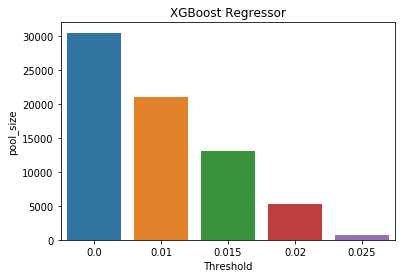

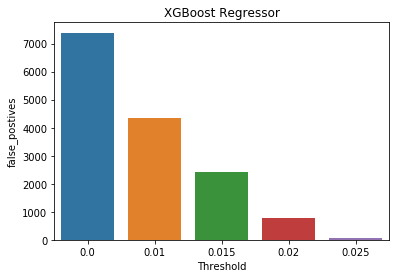

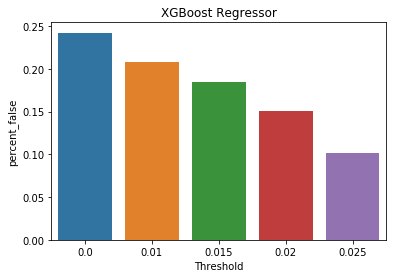

In [114]:
for f in feats:
    plt.figure()
    sns.barplot(x='threshold', y = f, data=l)
    plt.xlabel('Threshold')
    plt.title('XGBoost Regressor')

In [116]:
# XGBoost classifier

l=[]
for i in boost_class_dfs:
    a = boost_class_dfs[i]
    
    l.append(len(a))
    l.append(len(a[a['cagr']<0]))
    l.append((len(a[a['cagr']<0])/(len(a))))

In [117]:
l = np.array(l)
l = l.reshape(5,3)
l = pd.DataFrame(l)
l.columns = ['pool_size', 'false_postives', 'percent_false']
l['threshold'] = [.5,.6,.7,.8,.9]

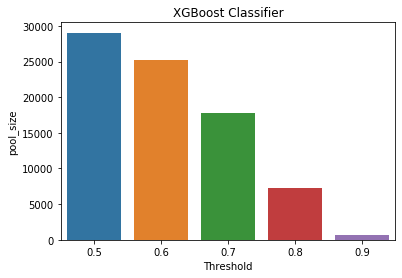

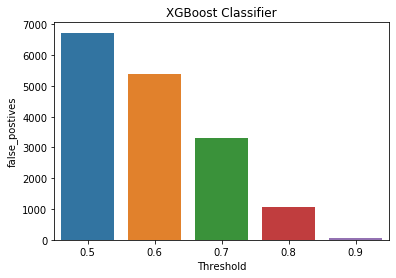

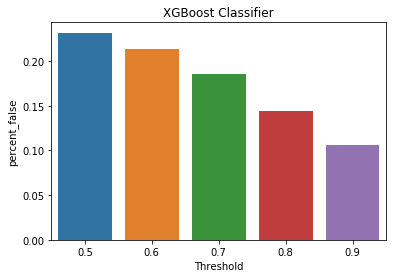

In [118]:
for f in feats:
    plt.figure()
    sns.barplot(x='threshold', y = f, data=l)
    plt.xlabel('Threshold')
    plt.title('XGBoost Classifier')

In [232]:
top_forest_df.to_csv('pool_forest_df.csv')

In [233]:
top_boost_reg_df.to_csv('pool_boost_reg_df.csv')

In [234]:
top_boost_class_df.to_csv('pool_boost_class_df.csv')